# US Baby Name

## GIỚI THIỆU
Dữ Liệu `US_BaBy_Names.csv` chứa thông tin của các em bé sinh từ 2004 - 2014 tại Mỹ. Dựa vào tập dữ liệu trên, bạn hãy thực hiện các bài tập sau:

## TÌM HIỂU DỮ LIỆU

### 01. Đọc dữ liệu

In [4]:
import pandas as pd
def readfile(filename):
        try:
            df=pd.read_csv(filename,encoding='utf-8')
        except FileNotFoundError:
            print (f"Error")
            return None
        return df
df=readfile('./US_Baby_Names.csv')
if df is not None:
     print('doc file thanh cong')


doc file thanh cong


### 02. Hiển thị 10 dòng dữ liệu bất kỳ

In [5]:
print(df.head(10))

   Unnamed: 0     Id      Name  Year Gender State  Count
0       11349  11350      Emma  2004      F    AK     62
1       11350  11351   Madison  2004      F    AK     48
2       11351  11352    Hannah  2004      F    AK     46
3       11352  11353     Grace  2004      F    AK     44
4       11353  11354     Emily  2004      F    AK     41
5       11354  11355   Abigail  2004      F    AK     37
6       11355  11356    Olivia  2004      F    AK     33
7       11356  11357  Isabella  2004      F    AK     30
8       11357  11358    Alyssa  2004      F    AK     29
9       11358  11359    Sophia  2004      F    AK     28


### 03. Cho biết kích thước dữ liệu

In [6]:
rows,col=df.shape
print(f'so dong la:{rows} so cot la: {col}')

so dong la:1016395 so cot la: 7


### 04. Xóa 2 cột 'Unnamed: 0' and 'Id'

In [8]:
df=df.drop(columns=['Unnamed: 0','Id'])
print(df.head(10))

       Name  Year Gender State  Count
0      Emma  2004      F    AK     62
1   Madison  2004      F    AK     48
2    Hannah  2004      F    AK     46
3     Grace  2004      F    AK     44
4     Emily  2004      F    AK     41
5   Abigail  2004      F    AK     37
6    Olivia  2004      F    AK     33
7  Isabella  2004      F    AK     30
8    Alyssa  2004      F    AK     29
9    Sophia  2004      F    AK     28


### 05. Cho biết số lượng bé trai, bé gái?

In [9]:
countf=(df['Gender']=='F').sum()
countM=(df['Gender']=='M').sum()
print(f'so luong nam {countf} so luong nu {countM}')

so luong nam 558846 so luong nu 457549


### 06. Trong bộ dữ liệu có bao nhiêu tên khác nhau?

In [16]:
countname=df['Name'].nunique()

print(f'so luong ten khac nhau la {countname}')

so luong ten khac nhau la 17632


### 07. Tên nào xuất hiện ít nhất?

In [17]:
coutnnamemin=df['Name'].value_counts()
name=coutnnamemin.idxmin()
sl=coutnnamemin.min()
print(f'ten co so lan xuat hien it nha la :{name} voi so lan {sl}')

ten co so lan xuat hien it nha la :Taeler voi so lan 1


### 08. Top 10 tên được sử dụng nhiều nhất?

In [19]:
top10=df['Name'].value_counts().head(10)
print(top10)


Riley     1112
Avery     1080
Jordan    1073
Peyton    1064
Hayden    1049
Taylor    1033
Jayden    1031
Alexis     984
Payton     971
Dakota     962
Name: Name, dtype: int64


## TRỰC QUAN DỮ LIỆU

### 09. Vẽ đồ thị top 10 tên xuất hiện nhiều nhất năm 2014

No handles with labels found to put in legend.
No handles with labels found to put in legend.


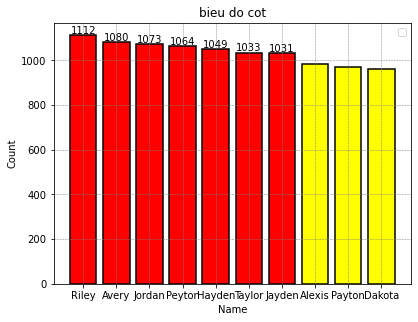

In [25]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6.4, 4.8))
top10_df=top10.reset_index()
top10_df.columns=['Name','Count']
color=[]
for value in top10_df['Count']:
    if value <1000 :
        color.append('yellow')
    else :
        color.append('red')
plt.bar(top10_df['Name'],top10_df['Count'], color=color,edgecolor='black',linewidth=1.5)
plt.legend()
plt.grid(color='gray', linestyle='--', linewidth=0.5)
for i,value in enumerate(top10_df['Count']):
    if value>1000 :
        plt.text(i,value+8,value,ha='center')
        
plt.title('bieu do cot')
plt.xlabel('Name')
plt.ylabel('Count')
plt.legend()
plt.show()

### 10. Vẽ đồ thị thể hiện tỷ lệ nam nữ qua các năm 2004-2014

   Unnamed: 0     Id      Name  Year Gender State  Count
0       11349  11350      Emma  2004      F    AK     62
1       11350  11351   Madison  2004      F    AK     48
2       11351  11352    Hannah  2004      F    AK     46
3       11352  11353     Grace  2004      F    AK     44
4       11353  11354     Emily  2004      F    AK     41
5       11354  11355   Abigail  2004      F    AK     37
6       11355  11356    Olivia  2004      F    AK     33
7       11356  11357  Isabella  2004      F    AK     30
8       11357  11358    Alyssa  2004      F    AK     29
9       11358  11359    Sophia  2004      F    AK     28


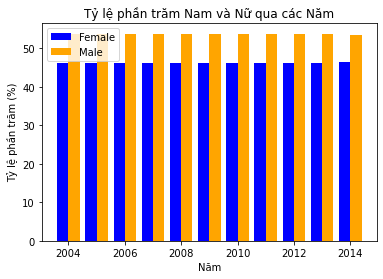

In [44]:
df=readfile('./US_Baby_Names.csv')
gender_counts = df.groupby(['Year', 'Gender'])['Count'].sum().unstack(fill_value=0)
print(df.head(10))

total_count = df.groupby('Year')['Count'].sum()
# Tính tỷ lệ phần trăm của mỗi giới tính trong từng năm
gender_percentage = gender_counts.divide(total_count, axis=0) * 100
years = gender_percentage.index
female_percentage = gender_percentage['F']  # Tỷ lệ phần trăm của nữ
male_percentage = gender_percentage['M']    # Tỷ lệ phần trăm của nam

# Vẽ biểu đồ cột cho tỷ lệ phần trăm giới tính
width = 0.4  # Độ rộng của các cột
plt.bar(years - width/2, female_percentage, width=width, label='Female', color='blue')
plt.bar(years + width/2, male_percentage, width=width, label='Male', color='orange')

# Thêm tiêu đề và nhãn
plt.title('Tỷ lệ phần trăm Nam và Nữ qua các Năm')
plt.xlabel('Năm')
plt.ylabel('Tỷ lệ phần trăm (%)')

# Thêm chú thích
plt.legend()

# Hiển thị biểu đồ
plt.show()




